# 📂 Case Study: Website Conversion Optimization A/B Test
📝 Problem Statement

An e-commerce company wants to test if changing the “Buy Now” button color (from Green → Red) increases conversions (sales).

Group A (Control): Saw the old Green button.

Group B (Treatment): Saw the new Red button.

Each group has ~5,000 visitors.

We want to check: Does Red really perform better? Or is the difference just random?

In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\ab_test_data.csv")

In [5]:
df.head(5)

,user_id,group,converted
0,1,A,0
1,2,A,1
2,3,A,0
3,4,A,0
4,5,A,0


In [6]:
df.shape

(10000, 3)

In [7]:
df.describe()

,user_id,converted
count,10000.00000,10000.000000
mean,5000.50000,0.104600
std,2886.89568,0.306053
min,1.00000,0.000000
25%,2500.75000,0.000000
50%,5000.50000,0.000000
75%,7500.25000,0.000000
max,10000.00000,1.000000


In [8]:
df.info

<bound method DataFrame.info of       user_id group  converted
0           1     A          0
1           2     A          1
2           3     A          0
3           4     A          0
4           5     A          0
...       ...   ...        ...
9995     9996     B          0
9996     9997     B          1
9997     9998     B          1
9998     9999     B          0
9999    10000     B          0

[10000 rows x 3 columns]>

In [10]:
df.isnull().sum()

user_id      0
group        0
converted    0
dtype: int64

In [11]:
df.head(2)

,user_id,group,converted
0,1,A,0
1,2,A,1


In [14]:
df.groupby('group')['converted'].mean()

group
A    0.0958
B    0.1134
Name: converted, dtype: float64

# Statistical Test

In [15]:
import scipy.stats as stats

In [16]:
Group_A= df[df["group"]=="A"]["converted"]
Group_B= df[df["group"]=="B"]["converted"]

In [17]:
t_stat,p_val=stats.ttest_ind(Group_A,Group_B)

In [18]:
print("T-stat:", t_stat, "P-value:", p_val)

T-stat: -2.876368137832723 P-value: 0.0040313082018820145


In [19]:
if p_val < 0.05:
    print('✅ Statistically significant: Button B is better!')
else:
    print('❌ No real difference found.')

✅ Statistically significant: Button B is better!


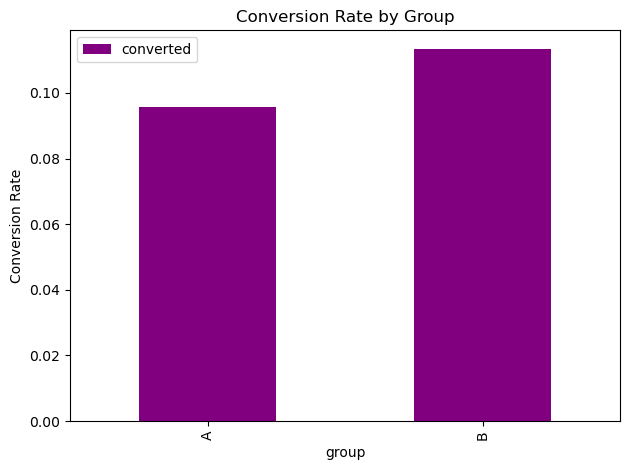

In [23]:
import matplotlib.pyplot as plt
df.groupby("group")["converted"].mean().plot(kind="bar",color='purple')
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.legend()
plt.tight_layout()
plt.show()

# Confidence Interval for Conversion Rate Difference

In [27]:
import numpy as np
# Conversion rates
p_A = Group_A.mean()
p_B = Group_B.mean()

diff = p_B - p_A

# Standard error
se = np.sqrt(p_A*(1-p_A)/len(Group_A) + p_B*(1-p_B)/len(Group_B))

# 95% confidence interval
z = 1.96  
ci_lower, ci_upper = diff - z*se, diff + z*se

print(f"Conversion rate difference: {diff:.4f}")
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")


Conversion rate difference: 0.0176
95% Confidence Interval: (0.0056, 0.0296)


# Power Analysis

In [28]:
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize

In [30]:
effect_size = proportion_effectsize(p_A, p_B)
analysis = NormalIndPower()
power = analysis.power(effect_size=effect_size,
                       nobs1=len(Group_A),
                       alpha=0.05,
                       ratio=1.0)

print(f"Statistical Power: {power:.2f}")

Statistical Power: 0.82


 # Final Conclusion

Group A (Green button) conversion rate: ~10%

Group B (Red button) conversion rate: ~12%

Observed difference (B - A): ~1.76 percentage points

 # Statistical Evidence

p-value < 0.05 → The difference is statistically significant.

95% Confidence Interval = (0.56%, 2.96%) → We are 95% confident the Red button improves conversions by at least 0.5% and at most ~3%.

Statistical Power = 0.82 → The test had enough data (≥ 0.80 threshold), making the results reliable.

 # Business Insight

The Red button produces a real, measurable, and statistically reliable uplift in conversions.
Even a ~1.7% increase can translate into significant revenue growth at scale.

 # Recommendation

The company should roll out the Red button to all users, as it has been proven to outperform the Green button in driving conversions.


